# Workshop 5

Starter code for workshop 5. You should have seen most of it before, but make sure you understand what it is doing!

In [6]:
# Common imports
import sys
import sklearn
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To plot even prettier figures
import seaborn as sn

# General data handling (pure numerics are better in numpy)
import pandas as pd

In [1]:
from sklearn.datasets import load_breast_cancer
# Get data
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [12]:
# Extract the features and target
xarray = data.data
yarray = data.target
fullarray = np.concatenate((xarray,np.reshape(yarray,(-1,1))),axis=1)

In [10]:
# Create a dataframe
fullarray[:,-1] = 1 - fullarray[:,-1]   # now invert the labels (so that malignant=1)
df = pd.DataFrame(fullarray,columns = list(data.feature_names) + ['target'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0


The code below is incomplete and will require some editing to work ...

# Splitting into separate datasets

In [6]:
from sklearn.model_selection import train_test_split

# Split our dataset in train, val and test
bigtrain_set, test_set = train_test_split(fullarray, test_size=0.2, random_state=42, stratify=fullarray[:,-1])
train_set, val_set = train_test_split(bigtrain_set, test_size=0.25, random_state=42, stratify=bigtrain_set[:,-1])

In [7]:
# Check dimmensions of our dataset
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]
X_val = val_set[:,:-1]
y_val = val_set[:,-1]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(341, 30), (341,), (114, 30), (114,), (114, 30), (114,)]


# Pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Creatae a general pipeline to transform our data
preproc_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler())])

# SGD Classifier

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, hinge_loss
import random

# This function allows you to notice how SGD classifier works behind the scenes
def sgdfn(nsamp, learnrate):
    # We need to set a SGD classifier model. Important parameters:
        # warm_start = True allows you to reuse previous solution to fit the initial parameter values
        # eta0 = learnrate sets the learning rate
        # learning_rate = 'contant' sets the same learning rate thorught all the iterations
    sgd = SGDClassifier(warm_start=True, learning_rate='constant', eta0=learnrate) 
    # We preprocess our data
    X_trainp = preproc_pl.fit_transform(X_train)
    X_valp = preproc_pl.transform(X_val)
    # Create a list to save results
    res=[]

    # We go do 2000 iterations
    for n in range(2000):
        # Select the sample with the size "nsamp"
        sample = random.sample(range(0, X_train.shape[0]), nsamp)
        # Train SGD with a part of the data. partial_fit perfoms one epoch over data
        sgd.partial_fit(X_trainp[sample,:],y_train[sample],classes=[0,1])
        # Make prediction
        y_val_pred = sgd.predict(X_valp)
        # Get accuracy
        sgd_acc = accuracy_score(y_val,y_val_pred)
        # Get the loss. Hinge loss is the default loss function
        sgd_loss = hinge_loss(y_val,y_val_pred)
        # Save results
        res += [[sgd_acc,sgd_loss]]

    # Create the result
    res = np.array(res)

    # Create the plot with results
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(res[:,0])
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.subplot(122)
    plt.plot(res[:,1])
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.show()

    print("The final accuracy is: ", res[-1,0])
    print("The final loss is: ", res[-1,1])


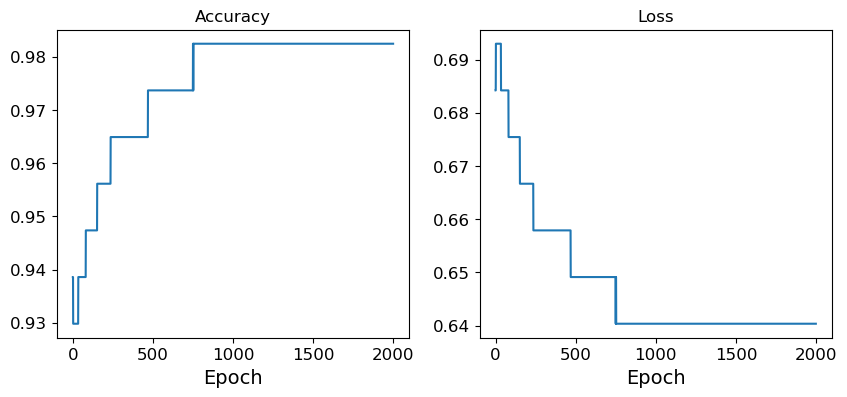

The final accuracy is:  0.9824561403508771
The final loss is:  0.6403508771929824


In [19]:
# We can try different sample size
ntrain = int(X_train.shape[0]*0.8)
# Implement our function
sgdfn(ntrain,0.00001)

Consider and try other important parameters, such as:

* **early_stopping**: To finish the learning process early, when the model detects is not necessary to train anymore.
* **learning_rate**: Define the beahviour of the learning rate through the entire learning process.
* **n_iter_no_change**: Define the number of iteration that model needs to wait until determine there is not improvement. After this, the model stops.
* **penalty**: Regularization used in the training process. Default is L2 norm (Ridge), but others (e.g. L1 norm, Lasso) may be implemented or None.

# Evaluating the best setting in test data

In [54]:
# Create the final model 
sgd = SGDClassifier(learning_rate='constant', eta0=0.0001, 
                        early_stopping=False,random_state=1,penalty='l2')   
sgd_pipe = Pipeline([('preproc',preproc_pl),('sgd',sgd)])

# Evaluate in validation
sgd_pipe.fit(X_train,y_train)
y_val_pred = sgd_pipe.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
n_iterations = sgd.n_iter_

# Evaluate in testing. Do you notice something interesting here? We are using train and val data to train
sgd_pipe.fit(np.concatenate((X_train,X_val),axis=0),np.concatenate((y_train,y_val),axis=0))
y_test_pred = sgd_pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Validation and Test accuracies are: {val_acc} and {test_acc} using {n_iterations} iterations')

Validation and Test accuracies are: 0.9736842105263158 and 0.9736842105263158 using 56 iterations
